In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
#TODO: øk font size på plot

In [3]:
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
X,y = datasets.load_diabetes(return_X_y=True, as_frame=True)

In [5]:
X.shape

(442, 10)

In [6]:
y.shape

(442,)

In [7]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [8]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [9]:
def plot_data(X,y):
    X_copy = X.copy()
    X_copy["target"] = y
    sns.pairplot(X_copy, hue = "target")
    plt.show()

In [10]:
#plot_data(X,y)

In [11]:
def plot_correlation_matrix(X,y):
    X_copy = X.copy()
    X_copy["target"] = y
    plt.figure(figsize=(10,10))
    sns.heatmap(X_copy.corr(), annot=True) #TODO: mask halve matrisen
    plt.show()

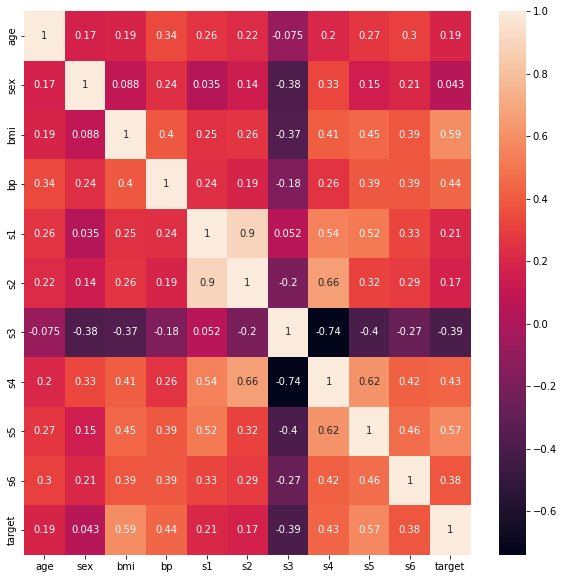

In [12]:
plot_correlation_matrix(X,y)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=round((0.15 / 0.75),1), random_state=42)

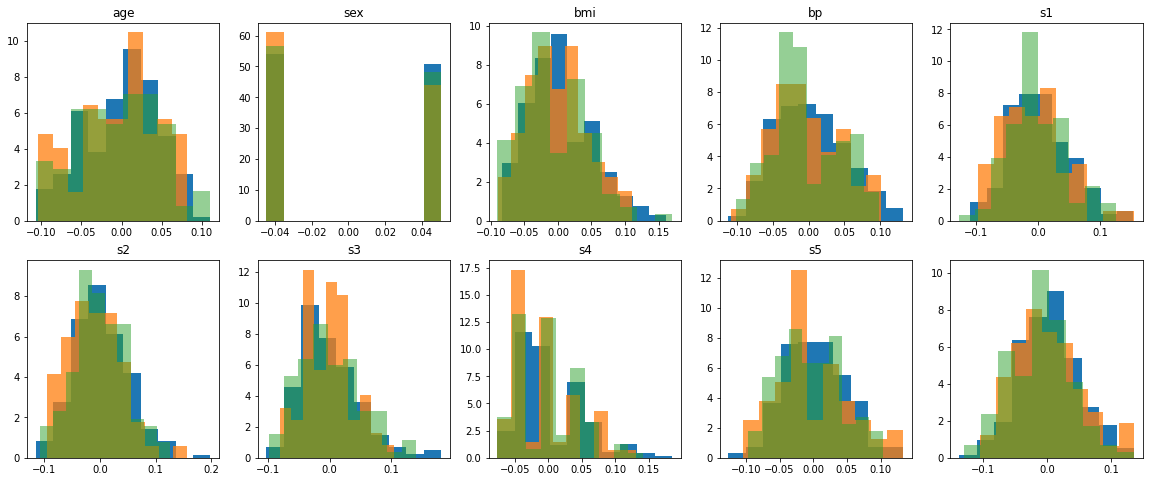

In [16]:
#TODO: plot normaliserte histogram
plt.figure(figsize=(20,8))
for i in range(X_train.shape[1]):
    plt.title(X_train.columns[i-1])
    plt.subplot(2,5,i+1)
    plt.hist(X_train.iloc[:,i], density=True, color="C0", label="train")
    plt.hist(X_val.iloc[:,i], density=True, color="C1", alpha=0.75, label="val")
    plt.hist(X_test.iloc[:,i], density=True, color="C2", alpha=0.5, label="test")
plt.show()    

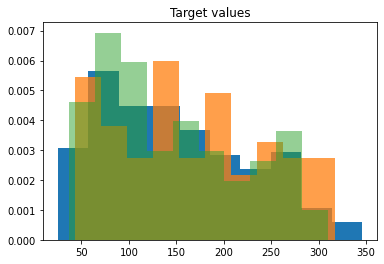

In [17]:
plt.title("Target values")
plt.hist(y_train, density=True, color="C0", label="train")
plt.hist(y_val, density=True, color="C1", alpha=0.75, label="val")
plt.hist(y_test, density=True, color="C2", alpha=0.5, label="test")
plt.show()    

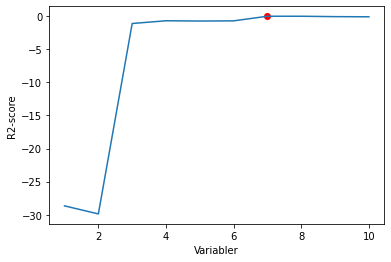

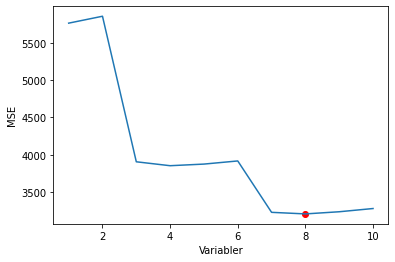

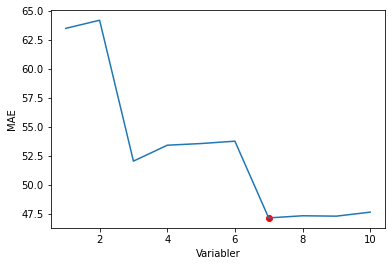

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,  mean_squared_error, mean_absolute_error
#train models
scores = np.empty((3,10))
for i in range(X_train.shape[1]):
    linreg = LinearRegression()
    linreg.fit(X_train.iloc[:,:i+1],y_train)
    
    y_val_hat = linreg.predict(X_val.iloc[:,:i+1])
    #print(f"Ytelse på valideringssettet basert på de {i+1} første av {X_train.shape[1]} variabler")
    #print("R2-score: " ,r2_score(y_val_hat,y_val))
    #print("MSE: ", mean_squared_error(y_val_hat,y_val))
    #print("MAE: ", mean_absolute_error(y_val_hat,y_val))
    #print("----------------------------------")
    scores[:,i] = r2_score(y_val_hat,y_val), mean_squared_error(y_val_hat,y_val), mean_absolute_error(y_val_hat,y_val)

score_names = ["R2-score", "MSE", "MAE"]
for num, metric_val in enumerate(scores):
    plt.plot(np.arange(1,X_train.shape[1]+1),metric_val)
    plt.ylabel(score_names[num])
    plt.xlabel("Variabler")
    if score_names[num] == "R2-score":
        plt.scatter(metric_val.argmax()+1,metric_val.max(),color="r")
    else:
        plt.scatter(metric_val.argmin()+1,metric_val.min(),color="r")
    plt.show()


Vi har nå funnet den beste modellen hva gjelder ytelse på valideringssettet og velger denne "konfigurasjonen" videre for test på testsettet.

Før vi går videre gjentar vi bare forsøket en gang til med 9 variable

In [19]:
linreg = LinearRegression()
linreg.fit(X_train.iloc[:,:9],y_train)

y_train_hat = linreg.predict(X_train.iloc[:,:9])
y_val_hat = linreg.predict(X_val.iloc[:,:9])

print("Scoring på treningsdata:")
print("R2-score: " ,r2_score(y_train_hat,y_train))
print("MSE: ", mean_squared_error(y_train_hat,y_train))
print("MAE: ", mean_absolute_error(y_train_hat,y_train))
print("\n")
print("Scoring på valideringsdata:")
print("R2-score: " ,r2_score(y_val_hat,y_val))
print("MSE: ", mean_squared_error(y_val_hat,y_val))
print("MAE: ", mean_absolute_error(y_val_hat,y_val))


Scoring på treningsdata:
R2-score:  0.08203205063449126
MSE:  2874.667938922514
MAE:  43.33443343849466


Scoring på valideringsdata:
R2-score:  -0.04792209085910004
MSE:  3237.793323792771
MAE:  47.31664121832161


Nå som vi har funnet den optimale konfigurasjonen kan man velge å slå trening og valideringssettet sammen

In [20]:
X_dev = pd.concat([X_train,X_val])

In [21]:
y_dev = np.hstack([y_train, y_val])

In [22]:
linreg = LinearRegression()
linreg.fit(X_dev.iloc[:,:9],y_dev)
y_test_hat = linreg.predict(X_test.iloc[:,:9])

print("Scoring på testdata:")
print("R2-score: " ,r2_score(y_test_hat,y_test))
print("MSE: ", mean_squared_error(y_test_hat,y_test))
print("MAE: ", mean_absolute_error(y_test_hat,y_test))

Scoring på testdata:
R2-score:  0.0946874452117542
MSE:  2863.4683180937163
MAE:  41.57636933509947


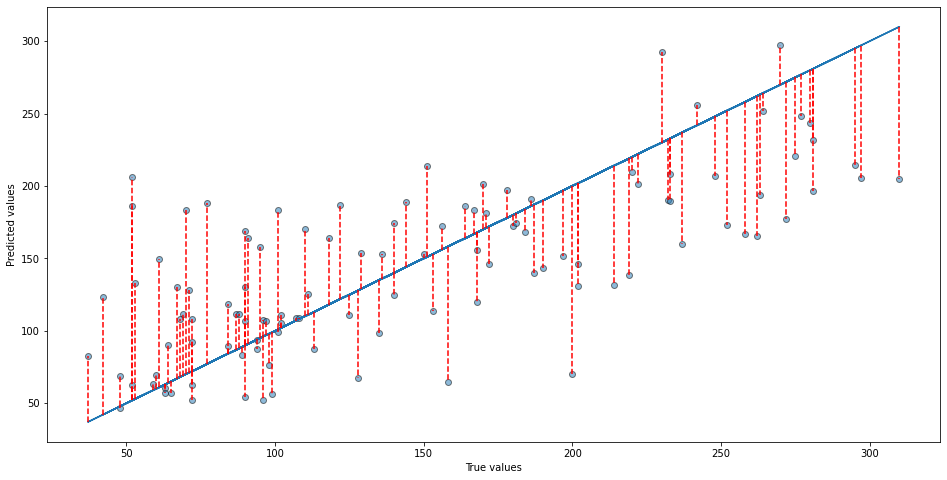

In [23]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,y_test_hat, color="C0", alpha=0.5, edgecolors="black")
plt.plot(y_test,y_test, color="C0")
plt.vlines(y_test,ymin=y_test ,ymax=y_test_hat, color="red", linestyles="--")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

In [24]:
linreg.coef_.shape

(9,)

In [25]:
linreg.intercept_

151.7212142083992

### En liten tilleggsopplysning:

Legg merke til variasjonen i ytelse 

In [26]:
scores_train = np.empty((100,3))
scores_val = np.empty((100,3))
model_coef = np.empty((100,9))
model_intercept = np.empty((100,1))
for i in range(100):
    linreg = LinearRegression()
    linreg.fit(X_train.iloc[:,:9],y_train)
    
    model_coef[i] = linreg.coef_
    model_intercept[i] = linreg.intercept_
    
    y_train_hat = linreg.predict(X_train.iloc[:,:9])
    y_val_hat = linreg.predict(X_val.iloc[:,:9])
    
    scores_train[i] = r2_score(y_train_hat,y_train), mean_squared_error(y_train_hat,y_train), mean_absolute_error(y_train_hat,y_train)
    scores_val[i] = r2_score(y_val_hat,y_val), mean_squared_error(y_val_hat,y_val), mean_absolute_error(y_val_hat,y_val)

In [27]:
scores_train.std(axis=0)

array([6.93889390e-17, 2.72848411e-12, 0.00000000e+00])

In [28]:
scores_val.std(axis=0)

array([6.93889390e-17, 1.81898940e-12, 1.13686838e-13])

In [29]:
model_coef.std(axis=0)

array([1.42108547e-14, 0.00000000e+00, 7.95807864e-13, 1.08002496e-12,
       1.13686838e-12, 5.68434189e-13, 5.68434189e-14, 5.11590770e-13,
       9.09494702e-13])

In [30]:
model_intercept.std()

2.842170943040401e-14

Hverken modelparametre eller ytelse varier noen ting. Gitt den samme dataen er lineær regresjon, m/OLS som målfunksjon, et deterministisk system. Dette er kanskje ikke noe overraskelse, men vi skal senere få se at for de fleste maskinlæringsmodeller så må vi ta hensyn til at ytelsen til modellen kan variere fra gang til gang, til tross for at treningsdata og andre parametre holdes likt. 

In [31]:
import shap

In [32]:
# Create object that can calculate shap values

explainer = shap.LinearExplainer(linreg, X_dev.iloc[:,:9])
# Calculate Shap values
shap_values = explainer.shap_values(X_test.iloc[:,:9])

In [33]:
# Global forklaring

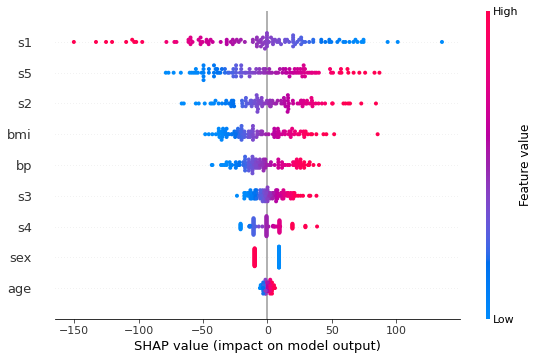

In [34]:
shap.summary_plot(shap_values, X_test.iloc[:,:9])

In [35]:
y_test = y_test.reset_index(drop=True)

In [36]:
# Lokale forklaringer

Ground Truth:  219.0


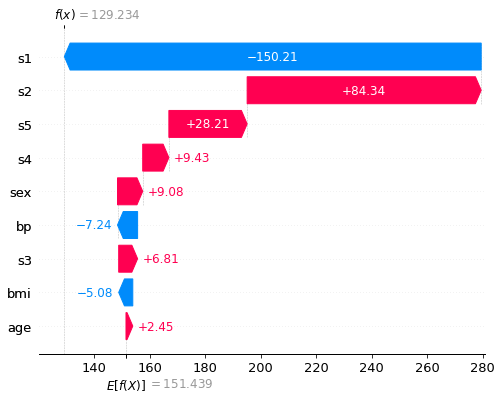

Ground Truth:  70.0


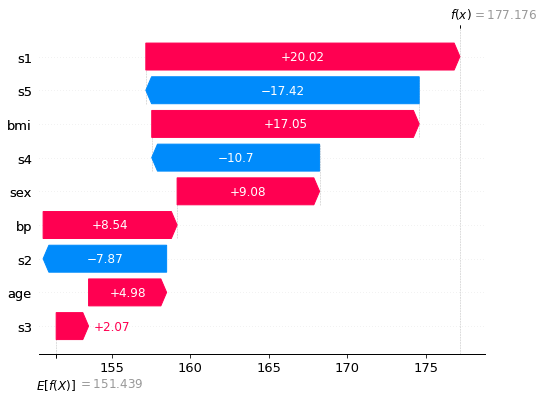

Ground Truth:  202.0


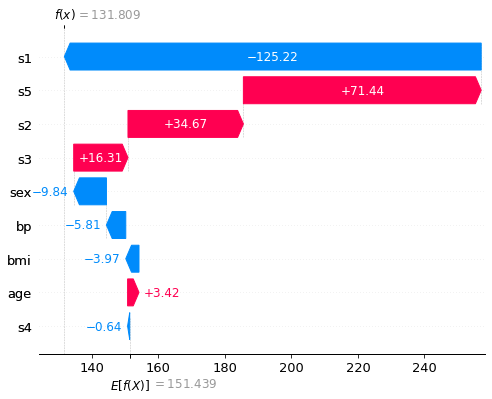

In [37]:
for i in range(3):
    print("Ground Truth: ", y_test[i])
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[i], feature_names=X_test.columns)
    plt.show()

Ground Truth: 94.0000
Model Prediction: 95.6090

Modified Input:


,age,sex,bmi,bp,s1,s2,s3,s4,s5
0,0.110727,-0.044642,-0.033151,-0.022885,0.046589,0.041587,0.056003,-0.024733,-0.025953


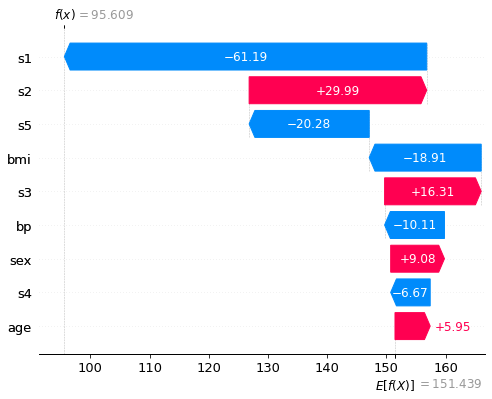

In [38]:
import shap
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import numpy as np



sample_selector = widgets.IntSlider(
    value=0,
    min=0,
    max=len(X_test) - 1,
    step=1,
    description='Sample:',
    continuous_update=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='95%')
)

feature_widgets = {}

def create_feature_sliders(sample_idx):
    """Create sliders for each feature in the correct order."""
    feature_widgets.clear()
    sliders = []
    for col in linreg.feature_names_in_:  # <-- ensures correct order
        val = float(X_test.iloc[sample_idx][col])
        slider = widgets.FloatSlider(
            value=val,
            min=float(X_test[col].min()),
            max=float(X_test[col].max()),
            step=(float(X_test[col].max()) - float(X_test[col].min())) / 100,
            description=col,
            continuous_update=False,
            layout=widgets.Layout(width='95%')
        )
        feature_widgets[col] = slider
        sliders.append(slider)
    return sliders


def update_plot(change=None):
    """Recompute model prediction, SHAP values, and redraw waterfall."""
    # Build DataFrame in same order as model was trained
    x_modified = pd.DataFrame(
        [[feature_widgets[col].value for col in linreg.feature_names_in_]],
        columns=linreg.feature_names_in_
    )

    y_pred = linreg.predict(x_modified)[0]
    shap_values_modified = explainer(x_modified)

    clear_output(wait=True)
    display(ui)
    print(f"Ground Truth: {y_test.iloc[sample_selector.value]:.4f}")
    print(f"Model Prediction: {y_pred:.4f}")
    print("\nModified Input:")
    display(x_modified)

    shap.plots._waterfall.waterfall_legacy(
        explainer.expected_value,
        shap_values_modified[0].values,
        feature_names=linreg.feature_names_in_
    )
    plt.show()


def on_sample_change(change):
    """When sample changes, rebuild sliders in 3 columns."""
    sliders = create_feature_sliders(change['new'])

    n = len(sliders)
    col_size = int(np.ceil(n / 3))
    col1 = widgets.VBox(sliders[:col_size])
    col2 = widgets.VBox(sliders[col_size:2 * col_size])
    col3 = widgets.VBox(sliders[2 * col_size:])
    sliders_grid = widgets.HBox([col1, col2, col3])

    for slider in feature_widgets.values():
        slider.observe(update_plot, names='value')

    right_box.children = [sliders_grid]
    update_plot()



right_box = widgets.VBox([])
ui = widgets.VBox([
    sample_selector,
    right_box
])


sample_selector.observe(on_sample_change, names='value')
display(ui)
on_sample_change({'new': 0})
